In [1]:
!pip install git+https://github.com/molivka/adaboost-coursework

  Cloning https://github.com/molivka/adaboost-coursework to /private/var/folders/kq/ts45vww901v_jqz315625p0h0000gq/T/pip-req-build-2sbqhg67
  Running command git clone --filter=blob:none --quiet https://github.com/molivka/adaboost-coursework /private/var/folders/kq/ts45vww901v_jqz315625p0h0000gq/T/pip-req-build-2sbqhg67
  Resolved https://github.com/molivka/adaboost-coursework to commit fecb73fe66fff67d0e3abe4e6dba71fdcb21ff04
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
!pip install kagglehub
!pip install pandas
!pip install numpy
!pip install scikit-learn

In [3]:
from src.classifier import AdaBoost
from src.weak_learner import DecisionStump, DecisionTree
from src.utils import calc_accuracy

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import kagglehub

/Users/m.utebaeva/vs/adaboost-coursework/.venv/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
path = kagglehub.dataset_download("mathchi/diabetes-data-set")

print("Path to dataset files:", path)

Path to dataset files: /Users/m.utebaeva/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1


In [5]:
df = pd.read_csv(path + "/diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
# разбиваем данные на обучающую и тестовую выборки
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# смотрим при каком количестве шагов T метрика accuracy максимальна
best_accuracy = 0
best_T = 0

for T in range(1, 100):
    model_stump = AdaBoost(DecisionStump, T=T)
    model_stump.fit(X_train, y_train, visualize=False)
    y_pred = model_stump.predict(X_test)
    accuracy = calc_accuracy(y_test, y_pred)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_T = T

In [29]:
print(f"Best accuracy for ensemble with DecisionStump: {best_accuracy} at T = {best_T}")

Best accuracy for ensemble with DecisionStump: 0.7857142857142857 at T = 6


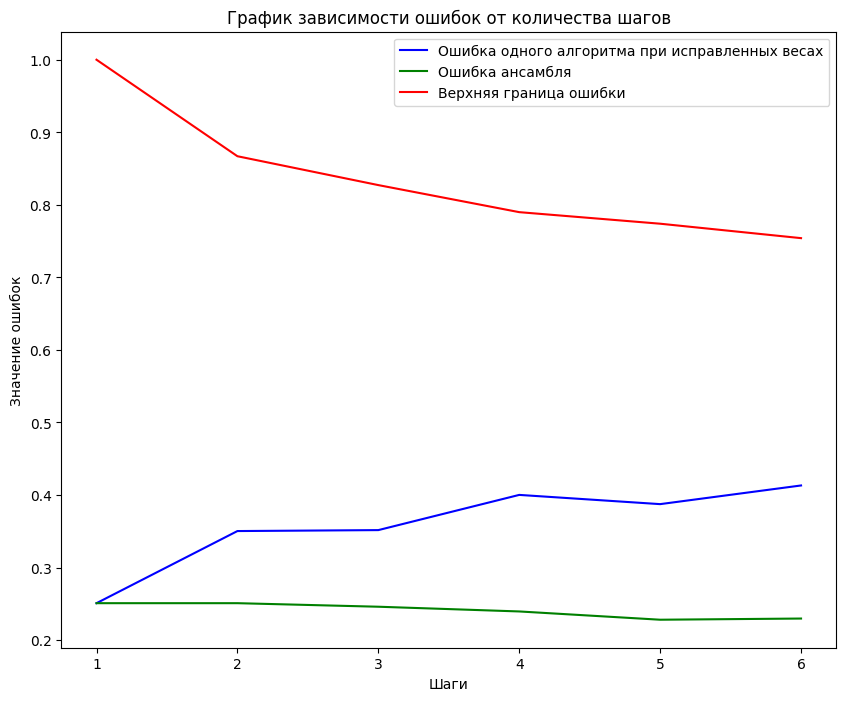

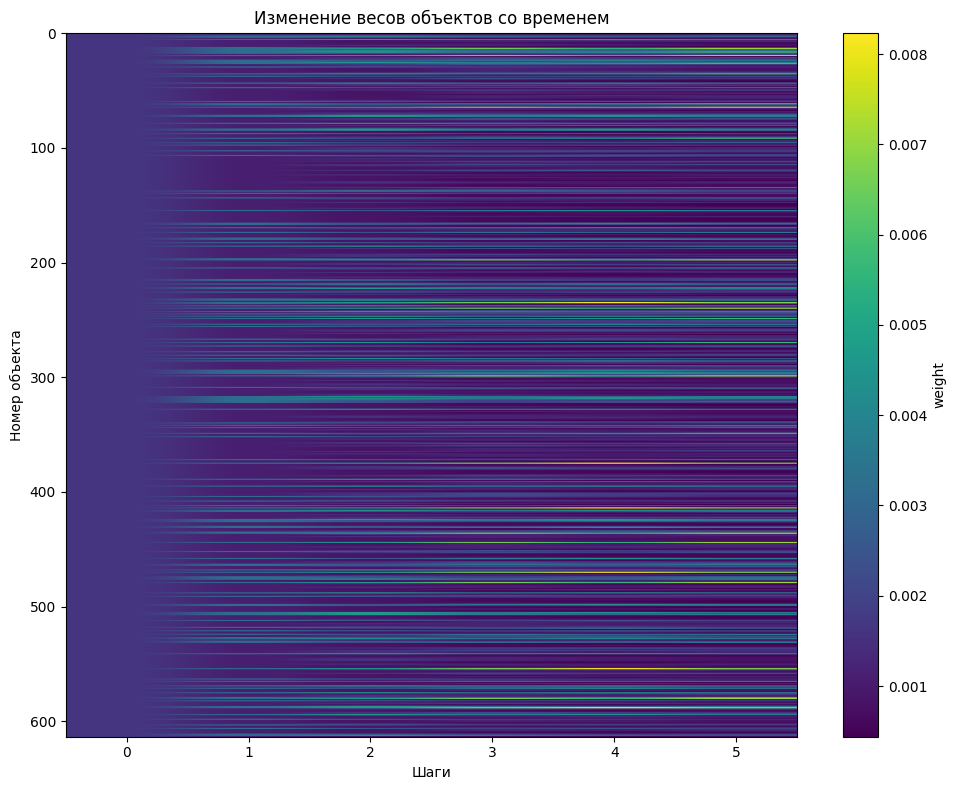

In [30]:
# обучение ансамбля с базовым алгоритмом DecisionStump + визуализация
model_stump = AdaBoost(DecisionStump, T=best_T)
model_stump.fit(X_train, y_train, visualize=True)

In [31]:
# предсказание ансамбля с базовым алгоритмом DecisionStump + просмотр метрики accuracy
y_pred = model_stump.predict(X_test)
accuracy = calc_accuracy(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7857142857142857


In [32]:
# смотрим при каком количестве шагов T метрика accuracy максимальна
best_accuracy = 0
best_T = 0

for T in range(1, 100):
    model_stump = AdaBoost(DecisionTree, T=T)
    model_stump.fit(X_train, y_train, visualize=False)
    y_pred = model_stump.predict(X_test)
    accuracy = calc_accuracy(y_test, y_pred)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_T = T

In [39]:
# обучение ансамбля с базовым алгоритмом DecisionTree + визуализация
model_tree = AdaBoost(DecisionTree, T=best_T)
model_tree.fit(X_train, y_train, visualize=False)

In [40]:
# предсказание ансамбля с базовым алгоритмом DecisionTree + просмотр метрики accuracy
y_pred = model_tree.predict(X_test)
accuracy = calc_accuracy(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7597402597402597
